# Assignment 1

# Question 1

### Word embeddings
Build embeddings with a keras implementation where the embedding vector is of length 50, 150 and 300. Use the Alice in Wonderland text book for training.
1. Using the Skipgram model
2. Using CBOW model
3. Analyze the different word embeddings
    - Implement your own function to perform the analogy task with. Do not use existing libraries for this task such as Gensim. Your function should be able to answer whether an anaology as in the example given in the pdf-file is true.
    - Compare the performance on the analogy task between the word embeddings
    - Visualize your results and interpret your results
4. Discuss:
    - What are the main advantages of CBOW and Skipgram?
    - What are the main drawbacks of CBOW and Skipgram?


In [266]:
from __future__ import division
import numpy as np
np.random.seed(13) #TODO Check if this is used for sgd
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape, Lambda
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing import sequence
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors as nn
from itertools import islice
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# DO NOT Modify the lines in this cell
path = 'alice.txt'
corpus = open(path).readlines()

corpus = [sentence for sentence in corpus if sentence.count(" ") >= 2]

tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'+"'")
tokenizer.fit_on_texts(corpus)
corpus = tokenizer.texts_to_sequences(corpus)
nb_samples = sum(len(s) for s in corpus)
V = len(tokenizer.word_index) + 1

# Is this something they need to change?
dim = 100
window_size = 2
window_size_corpus = 4

 # Skipgram

## Data Preparation

In [94]:
#prepare data for skipgram
def generate_data_skipgram(corpus, window_size, V):
    #TODO Implement here
    inputs = []
    outputs = []
    for line in corpus:
        length = len(line)
        for ind, word in enumerate(line):
            for i in range(ind - window_size, ind + window_size + 1):
                if i != ind and 0 <= i < length:
                    inputs.append(word)
                    outputs.append(np_utils.to_categorical(line[i],V))
    return (np.array(inputs), np.array(outputs))

In [95]:
#training data
x,y = generate_data_skipgram(corpus,window_size,V)

## Model Definition

In [96]:
#create Skipgram model
def skipgram_train(dim):
    skipgram = Sequential()
    skipgram.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
    skipgram.add(Reshape((dim,)))
    skipgram.add(Dense(input_dim=dim, kernel_initializer='uniform',activation='softmax', units = V))
    skipgram.compile(loss='categorical_crossentropy', optimizer='adadelta')
    skipgram.fit(x, y, batch_size=128, epochs=10, verbose=1)
    return skipgram

## Training

In [97]:
skipgram50 = skipgram_train(50)

Epoch 1/10
94556/94556 [==============================] - 15s 154us/step - loss: 7.5016
Epoch 2/10
94556/94556 [==============================] - 13s 134us/step - loss: 6.6648
Epoch 3/10
94556/94556 [==============================] - 14s 146us/step - loss: 6.2697
Epoch 4/10
94556/94556 [==============================] - 16s 166us/step - loss: 6.0943
Epoch 5/10
94556/94556 [==============================] - 11s 121us/step - loss: 5.9922
Epoch 6/10
94556/94556 [==============================] - 12s 123us/step - loss: 5.9230
Epoch 7/10
94556/94556 [==============================] - 15s 156us/step - loss: 5.8719
Epoch 8/10
94556/94556 [==============================] - 15s 161us/step - loss: 5.8318
Epoch 9/10
94556/94556 [==============================] - 14s 149us/step - loss: 5.7987
Epoch 10/10
94556/94556 [==============================] - 13s 141us/step - loss: 5.7705


In [107]:
skipgram150 = skipgram_train(150)

Epoch 1/10
94556/94556 [==============================] - 29s 301us/step - loss: 7.4434
Epoch 2/10
94556/94556 [==============================] - 24s 255us/step - loss: 6.5453
Epoch 3/10
94556/94556 [==============================] - 22s 231us/step - loss: 6.1767
Epoch 4/10
94556/94556 [==============================] - 23s 240us/step - loss: 6.0103
Epoch 5/10
94556/94556 [==============================] - 23s 242us/step - loss: 5.9100
Epoch 6/10
94556/94556 [==============================] - 22s 235us/step - loss: 5.8403
Epoch 7/10
94556/94556 [==============================] - 23s 242us/step - loss: 5.7871
Epoch 8/10
94556/94556 [==============================] - 22s 232us/step - loss: 5.7445
Epoch 9/10
94556/94556 [==============================] - 22s 231us/step - loss: 5.7094
Epoch 10/10
94556/94556 [==============================] - 22s 234us/step - loss: 5.6788


In [99]:
skipgram300 = skipgram_train(300)

Epoch 1/10
94556/94556 [==============================] - 44s 467us/step - loss: 7.3743
Epoch 2/10
94556/94556 [==============================] - 48s 504us/step - loss: 6.4481
Epoch 3/10
94556/94556 [==============================] - 43s 451us/step - loss: 6.1112
Epoch 4/10
94556/94556 [==============================] - 38s 404us/step - loss: 5.9533
Epoch 5/10
94556/94556 [==============================] - 39s 417us/step - loss: 5.8548
Epoch 6/10
94556/94556 [==============================] - 39s 408us/step - loss: 5.7844
Epoch 7/10
94556/94556 [==============================] - 34s 362us/step - loss: 5.7308
Epoch 8/10
94556/94556 [==============================] - 36s 380us/step - loss: 5.6871
Epoch 9/10
94556/94556 [==============================] - 41s 436us/step - loss: 5.6491
Epoch 10/10
94556/94556 [==============================] - 41s 436us/step - loss: 5.6153


# CBOW

## Data Preparation

In [100]:
#prepare data for CBoW
from keras.preprocessing import sequence

def generate_data_cbow(corpus, window_size, V):
    #TODO Implement here
    inputs = []
    outputs = []
    for line in corpus:
        length = len(line)
        for ind, word in enumerate(line):
            inputs.append([line[i] for i in range(ind-window_size, ind+window_size+1) if i != ind and 0 <= i < length])
            outputs.append(np_utils.to_categorical(word,V))
    return (np.array(sequence.pad_sequences(inputs,maxlen=window_size*2)), np.array(outputs)) 

In [101]:
#training data
x_cbow, y_cbow = generate_data_cbow(corpus,window_size,V)

## Model Definition

In [102]:
#create CBOW model
def cbow_train(dim):
    cbow = Sequential()
    cbow.add(Embedding(input_dim=V,output_dim=dim,input_length=window_size*2))
    cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(dim,)))
    cbow.add(Dense(V,activation='softmax'))
    cbow.compile(loss='categorical_crossentropy', optimizer='adadelta')
    cbow.fit(x_cbow,y_cbow,batch_size=128,epochs=10,verbose=1)
    return cbow
#TODO CBOW keras implementation

## Training

In [103]:
cbow50 = cbow_train(50)

Epoch 1/10
27165/27165 [==============================] - 5s 172us/step - loss: 7.7674
Epoch 2/10
27165/27165 [==============================] - 4s 148us/step - loss: 7.4061
Epoch 3/10
27165/27165 [==============================] - 4s 149us/step - loss: 6.9154
Epoch 4/10
27165/27165 [==============================] - 4s 140us/step - loss: 6.6103
Epoch 5/10
27165/27165 [==============================] - 4s 139us/step - loss: 6.4195
Epoch 6/10
27165/27165 [==============================] - 4s 143us/step - loss: 6.2965
Epoch 7/10
27165/27165 [==============================] - 5s 202us/step - loss: 6.2068
Epoch 8/10
27165/27165 [==============================] - 5s 167us/step - loss: 6.1358
Epoch 9/10
27165/27165 [==============================] - 4s 151us/step - loss: 6.0767
Epoch 10/10
27165/27165 [==============================] - 4s 148us/step - loss: 6.0253


In [104]:
cbow150 = cbow_train(150)

Epoch 1/10
27165/27165 [==============================] - 8s 280us/step - loss: 7.7421
Epoch 2/10
27165/27165 [==============================] - 8s 289us/step - loss: 7.2143
Epoch 3/10
27165/27165 [==============================] - 6s 219us/step - loss: 6.7407
Epoch 4/10
27165/27165 [==============================] - 6s 220us/step - loss: 6.4592
Epoch 5/10
27165/27165 [==============================] - 6s 208us/step - loss: 6.2934
Epoch 6/10
27165/27165 [==============================] - 6s 206us/step - loss: 6.1812
Epoch 7/10
27165/27165 [==============================] - 6s 205us/step - loss: 6.0948
Epoch 8/10
27165/27165 [==============================] - 5s 197us/step - loss: 6.0216
Epoch 9/10
27165/27165 [==============================] - 5s 199us/step - loss: 5.9557
Epoch 10/10
27165/27165 [==============================] - 6s 220us/step - loss: 5.8947


In [105]:
cbow300 = cbow_train(300)

Epoch 1/10
27165/27165 [==============================] - 11s 419us/step - loss: 7.7199
Epoch 2/10
27165/27165 [==============================] - 13s 497us/step - loss: 7.1220
Epoch 3/10
27165/27165 [==============================] - 10s 351us/step - loss: 6.6488
Epoch 4/10
27165/27165 [==============================] - 9s 342us/step - loss: 6.3837
Epoch 5/10
27165/27165 [==============================] - 10s 369us/step - loss: 6.2277
Epoch 6/10
27165/27165 [==============================] - 9s 331us/step - loss: 6.1152
Epoch 7/10
27165/27165 [==============================] - 10s 376us/step - loss: 6.0229
Epoch 8/10
27165/27165 [==============================] - 10s 372us/step - loss: 5.9418
Epoch 9/10
27165/27165 [==============================] - 9s 349us/step - loss: 5.8678
Epoch 10/10
27165/27165 [==============================] - 11s 387us/step - loss: 5.8003


## Embeddings

In [290]:
emb50_sg = skipgram50.get_weights()[0]
emb150_sg = skipgram150.get_weights()[0]
emb300_sg = skipgram300.get_weights()[0]
emb50_cbow = cbow50.get_weights()[0]
emb150_cbow = cbow150.get_weights()[0]
emb300_cbow = cbow300.get_weights()[0]
vocab = [i for i in tokenizer.word_index][100:300]

In [299]:
def AnalogyTest(target, target_rel, comp_word, comp_word_rel, embed):
    target_emb = extractEmbed(target, embed)
    target_rel_emb = extractEmbed(target_rel, embed)
    comp_word_emb = extractEmbed(comp_word, embed)
    comp_word_rel_emb = extractEmbed(comp_word_rel, embed)
    temp = comp_word_emb-comp_word_rel_emb+target_rel_emb
    

    dist = cosine_similarity([temp], [extractEmbed(target, embed)])
    
    #Below there is another method for analogy task in which first the word that is most similar to the embedding vector "temp"(king-man+woman) 
    #is found and then the similarity between this word and the target word(queen) is computed.
    """ 
    distances = np.array([]).reshape(0,2)
    for i in tokenizer.word_index:
        if i not in [target_rel, comp_word, comp_word_rel]:
            distances=np.vstack([distances, [tokenizer.texts_to_sequences([i])[0][0], cosine_similarity([extractEmbed(i,embed)], [temp])]])
    
    word_ind = distances[:,1].argmax()
    word = vocab[word_ind]
    fin_dist = cosine_similarity([extractEmbed(word,embed)], [target_emb])
    """
    
    
    return dist[0][0]
    

# Analogy Test

## CBOW

In [338]:
dist50 = AnalogyTest("done", "do", "gone", "go", emb50_cbow)
print("similarity with embedding size 50:",dist50)

dist150 = AnalogyTest("done", "do", "gone", "go", emb150_cbow)
print("similarity with embedding size 150:",dist150)

dist300 = AnalogyTest("done", "do", "gone", "go", emb300_cbow)
print("similarity with embedding size:",dist300)

similarity with embedding size 50: 0.8658389
similarity with embedding size 150: 0.71905035
similarity with embedding size: 0.5722512


In [339]:
dist50 = AnalogyTest("up", "down", "right", "left", emb50_cbow)
print("similarity with embedding size 50:",dist50)

dist150 = AnalogyTest("up", "down", "right", "left", emb150_cbow)
print("similarity with embedding size 150:",dist150)

dist300 = AnalogyTest("up", "down", "right", "left", emb300_cbow)
print("similarity with embedding size:",dist300)

similarity with embedding size 50: 0.9748881
similarity with embedding size 150: 0.9264906
similarity with embedding size: 0.88602674


In [340]:
dist50 = AnalogyTest("queen", "woman", "king", "man", emb50_cbow)
print("similarity with embedding size 50:",dist50)

dist150 = AnalogyTest("queen", "woman", "king", "man", emb150_cbow)
print("similarity with embedding size 150:",dist150)

dist300 = AnalogyTest("queen", "woman", "king", "man", emb300_cbow)
print("similarity with embedding size:",dist300)

similarity with embedding size 50: 0.981384
similarity with embedding size 150: 0.9539163
similarity with embedding size: 0.9155589


## Skipgram

In [341]:
dist50 = AnalogyTest("done", "do", "gone", "go", emb50_sg)
print("similarity with embedding size 50:",dist50)

dist150 = AnalogyTest("done", "do", "gone", "go", emb150_sg)
print("similarity with embedding size 150:",dist150)

dist300 = AnalogyTest("done", "do", "gone", "go", emb300_sg)
print("similarity with embedding size:",dist300)

similarity with embedding size 50: 0.8694933
similarity with embedding size 150: 0.73995113
similarity with embedding size: 0.61622626


In [342]:
dist50 = AnalogyTest("up", "down", "right", "left", emb50_sg)
print("similarity with embedding size 50:",dist50)

dist150 = AnalogyTest("up", "down", "right", "left", emb150_sg)
print("similarity with embedding size 150:",dist150)

dist300 = AnalogyTest("up", "down", "right", "left", emb300_sg)
print("similarity with embedding size:",dist300)

similarity with embedding size 50: 0.8742402
similarity with embedding size 150: 0.79416966
similarity with embedding size: 0.7189166


In [343]:
dist50 = AnalogyTest("queen", "woman", "king", "man", emb50_sg)
print("similarity with embedding size 50:",dist50)

dist150 = AnalogyTest("queen", "woman", "king", "man", emb150_sg)
print("similarity with embedding size 150:",dist150)

dist300 = AnalogyTest("queen", "woman", "king", "man", emb300_sg)
print("similarity with embedding size:",dist300)

similarity with embedding size 50: 0.8871444
similarity with embedding size 150: 0.8260174
similarity with embedding size: 0.74961156


## Comparison of the performances

It is possible to notice that both architectures obtains satisfying results in the proposed analogy tasks, furthermore the performance is higher when considering a context embedding with a low number of feature, which emphasize the potential of word embedding in SkipGram and CBOW even when using a not too large feature space. The fact that the optimal dimensionality for context embedding appears to be low might be related to the dimension of the considered dataset, which also implies a lower size for a vocabulary.
Nonetheless the proposed analogy tasks are designed to observe if the two algorithms are able to capture different type of correlations between the words in our dataset. Indeed, apart from the suggested analogy -- Queen = King - man + woman --, we propose other two analogies. The first is supposed to capture grammatical correlation as: gone = done - do + go, and the second aims to check if the model are also able to learn the notion of contraries, as in: up = left - right + down.

# Visualization

In [291]:
#Visualization results trained word embeddings
def tsne_plot(vocab, embed):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in vocab:
        tokens.append(extractEmbed(word, embed))
        labels.append(word)
    
    print("splitting done")
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    print("fitting done")
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

## CBOW with embedding length 50

splitting done
fitting done


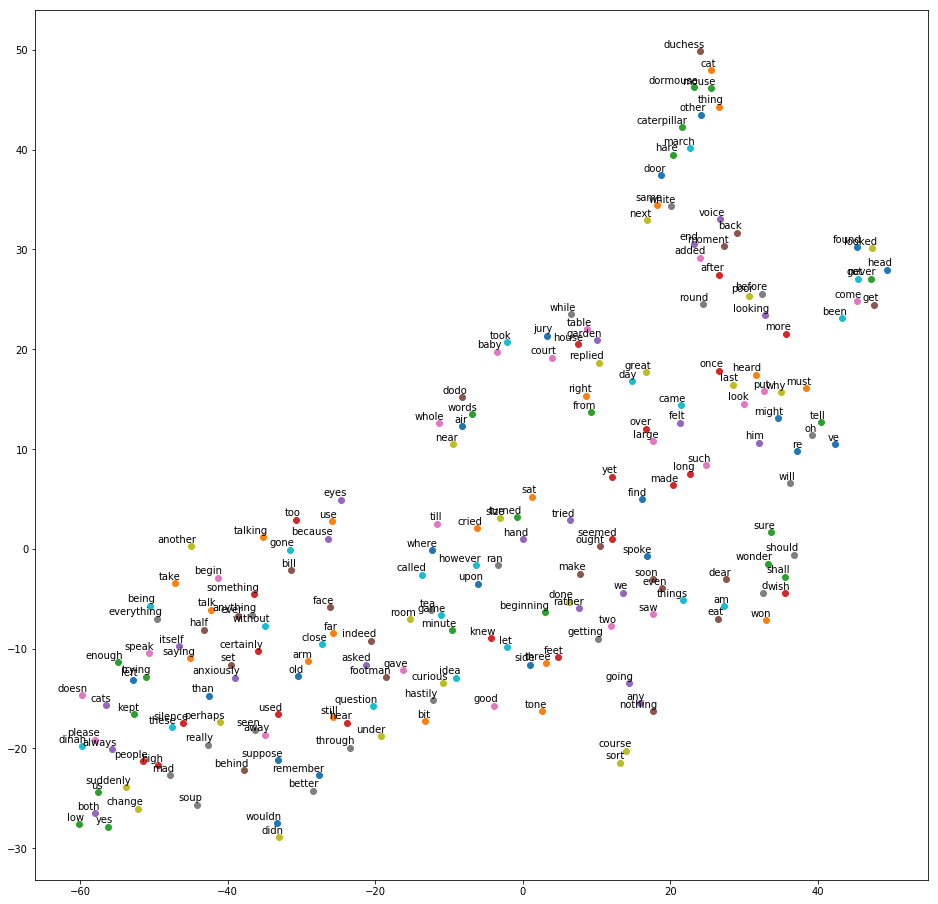

In [324]:
tsne_plot(vocab, emb50_cbow)

## Skipgram with embedding length 50

splitting done
fitting done


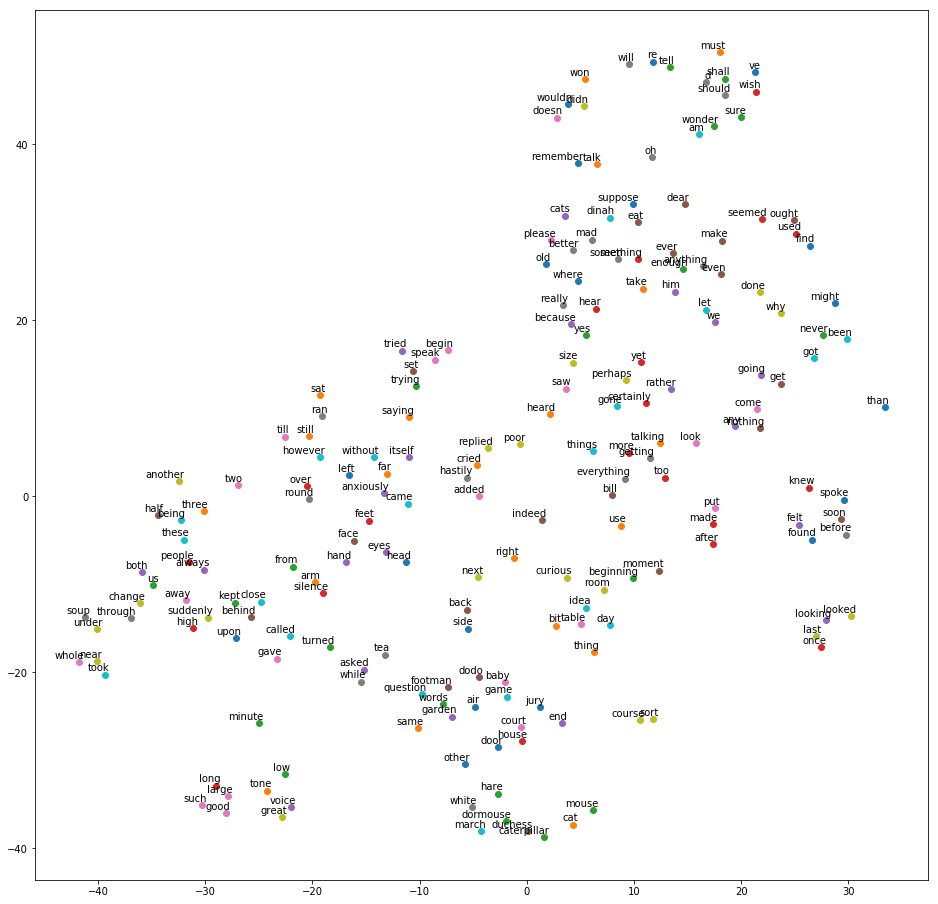

In [344]:
tsne_plot(vocab, emb50_sg)

## Visualization Comments

In the proposed visualization it is possible to observe 200 words of the given dataset. The most frequent 100 words are skipped due to the fact that they are most likely to be very frequent and not particularly significant, such as articles and names. It is possible to notice that both algorithms actually have related words represented close to each other. As an example the words "arm", "face", "eyes", "feet", "hand" and "head" tends to be in the same area. Another example can be made by verbs, which are usually split in different groups, where verbs in the same area appears to be verbs that are likely to be used in the same phrase. It is also interesting to notice that verbs are not the only words that are grouped depending on wether or not they are likely to be in the same phrase, it is actually quite easy to check on the plot that words in the same area are likely to enter in the same phrase, as it possible to notice, for example, by the fact that both algorithms place "oh" and "dear" close to each other.

# Model Comparison

Discussion of the advantages of CBOW and Skipgram, the advantages of negative sampling and drawbacks of CBOW and Skipgram

The main advantages in using CBOW and SkipGram is the simplicity of their architecture. This two algorithms are indeed extremely efficient in learning the embedding matrix from large datasets. The main advantage of the efficiency of the two given architectures is that a very large dataset can be used for training in a reasonable time, specially compared with the results obtained when using a different model, such as the N-gram. Regarding word embedding, it is clear that each word can present a large amount of properties, such as the gender of the word, the multiplicity, or the different contexts in which it can be used, therefore it is useful to train the model on a text dataset which contains a large variety of usage for each words, which is accomplished when considering a very large dataset. Indeed in **Efficient Estimation of Word Representations in Vector Space** by Mikolov et al. the results in terms of performance for both SkipGram and CBOW are obtained considering data that present billions of words.

Considering a large dataset also reduce the number of epochs needed to train the data to get a high accuracy for the model. On the other hand in the proposed implementation, the model is trained over the file *"alice.txt"*, which contains less than 30'000 words. As a drawback the implemented model will struggle more in embedding words properly due to two main reasons: first, a way larger (and computationally more expensive) number of epochs should be ran to obtain the same order of magnitude of the dataset considered by the previously mentioned paper; second, the training will be always performed on the same phrases, which enables the algorithm to properly capture the meaning only for words which are often repeated in the considered book.